In [27]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [28]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


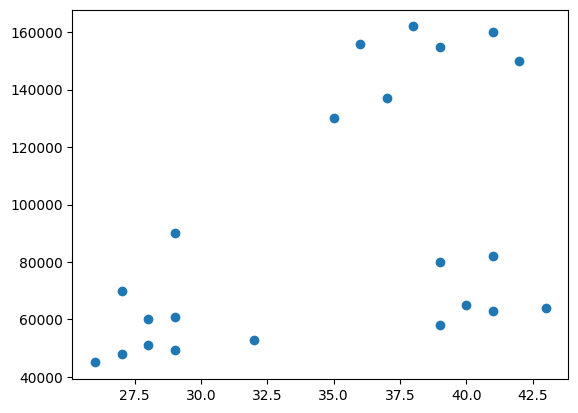

In [29]:
plt.scatter(df.Age, df['Income($)'])

In [30]:
km = KMeans(n_clusters=3)
y_predict = km.fit_predict(df[['Age' , 'Income($)']])
y_predict

array([0, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [31]:
df['cluster'] = y_predict
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [32]:
km.cluster_centers_

array([[3.24166667e+01, 5.72916667e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.63333333e+01, 8.40000000e+04]])

In [33]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


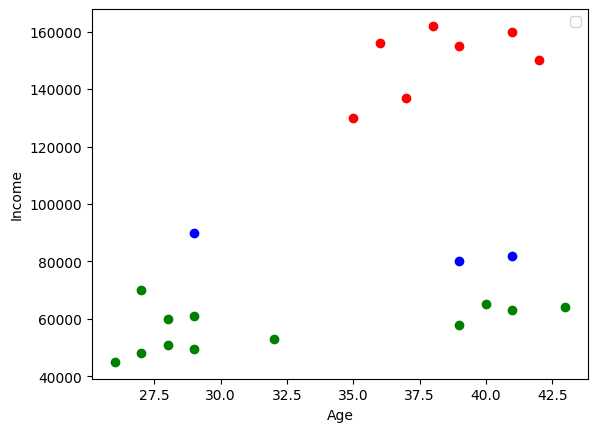

In [35]:
plt.scatter(df1.Age , df1['Income($)'] , color ='green')
plt.scatter(df2.Age , df2['Income($)'] , color ='red')
plt.scatter(df3.Age , df3['Income($)'] , color ='blue')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()

In [36]:
scalar = MinMaxScaler()
scalar.fit(df[['Income($)']])
df['Income($)'] = scalar.transform(df[['Income($)']])

In [37]:
df.head

<bound method NDFrame.head of         Name  Age  Income($)  cluster
0        Rob   27   0.213675        0
1    Michael   29   0.384615        2
2      Mohan   29   0.136752        0
3     Ismail   28   0.128205        0
4       Kory   42   0.897436        1
5     Gautam   39   0.940171        1
6      David   41   0.982906        1
7     Andrea   38   1.000000        1
8       Brad   36   0.948718        1
9   Angelina   35   0.726496        1
10    Donald   37   0.786325        1
11       Tom   26   0.000000        0
12    Arnold   27   0.025641        0
13     Jared   28   0.051282        0
14     Stark   29   0.038462        0
15    Ranbir   32   0.068376        0
16    Dipika   40   0.170940        0
17  Priyanka   41   0.153846        0
18      Nick   43   0.162393        0
19      Alia   39   0.299145        2
20       Sid   41   0.316239        2
21     Abdul   39   0.111111        0>

In [38]:
scalar.fit(df[['Age']])
df.Age = scalar.transform(df[['Age']])
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


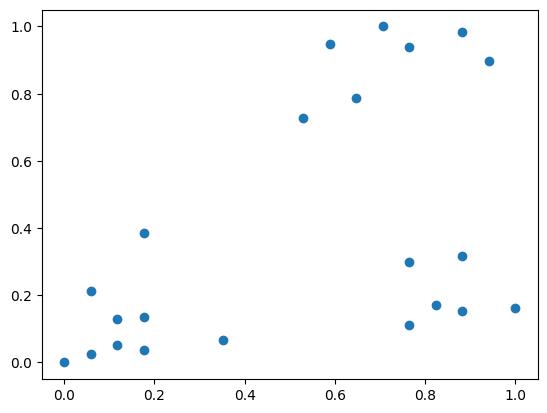

In [39]:
plt.scatter(df.Age, df['Income($)'])

In [41]:
km = KMeans(n_clusters=3)
y_predict = km.fit_predict(df[['Age' , 'Income($)']])
y_predict

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [42]:
df['cluster'] = y_predict
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [ ]:
y_predict.

In [43]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

In [44]:
km.cluster_centers_


array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

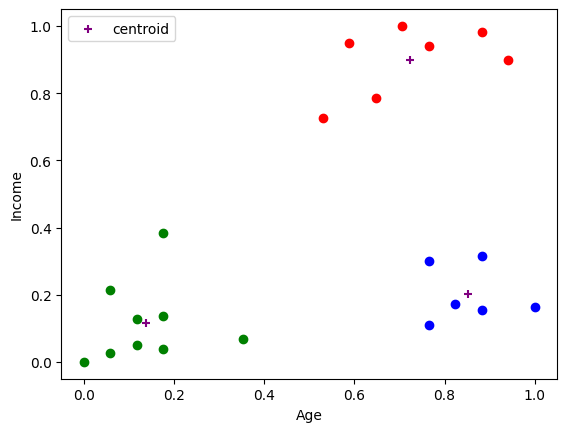

In [47]:
plt.scatter(df1.Age , df1['Income($)'] , color ='green')
plt.scatter(df2.Age , df2['Income($)'] , color ='red')
plt.scatter(df3.Age , df3['Income($)'] , color ='blue')
plt.xlabel('Age')
plt.ylabel('Income')
plt.scatter(km.cluster_centers_[:,0] , km.cluster_centers_[:,1], color='purple', marker='+' , label = 'centroid' )
plt.legend()

In [49]:
sse = [] 
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age' , 'Income($)']])
    sse.append(km.inertia_)
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553096,
 0.42015522057314436,
 0.336528430368078,
 0.2407627035421819,
 0.195226747467195,
 0.16919931375540168,
 0.10383752586603559]

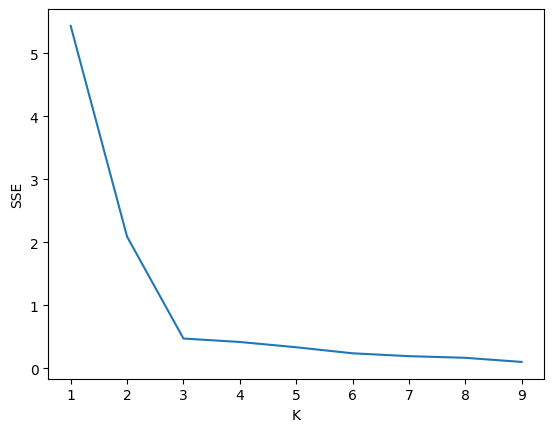

In [50]:
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(k_rng , sse)

In [ ]:
# Above elbow graph is showing the k value and the best k for our ploblem is 3